<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/20_Image_FFT_Alapok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tartalom

Éldetektálás Fast Fourier Transformációval

Egy nagyon jó magyarázat a 2D Fourier Transzformációra - Mi a két tengely?
https://youtu.be/3gAZ0U66AEA

A könyvben pedig a 228. oldalon van a kiegészítő magyarázat.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io

## Kép betöltése

(1040, 1392)


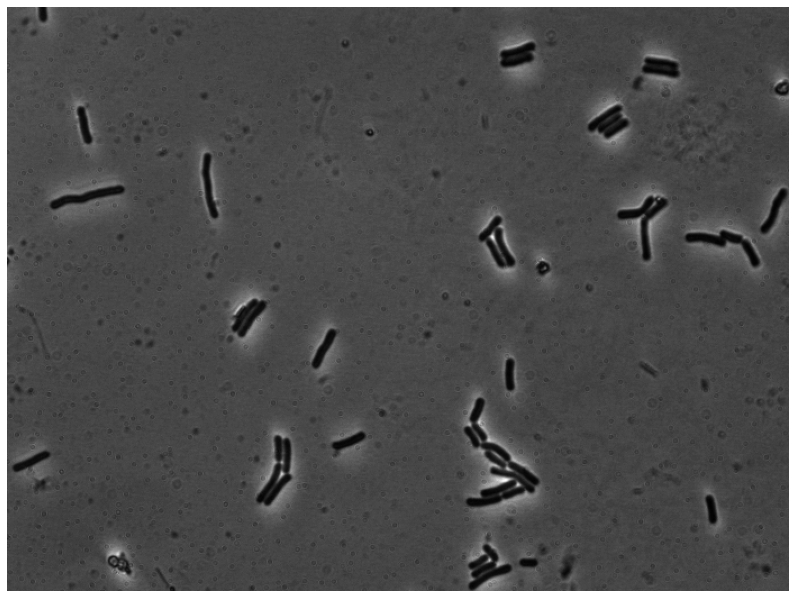

In [ ]:
E = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/bacteria2.tif?raw=true')

print(E.shape)

# G = np.mean(E, -1)

G = E[::2, ::2]

plt.figure(figsize=(14, 14))
plt.imshow(G, cmap = 'gray')
plt.axis('off')
plt.show()

(520, 696)


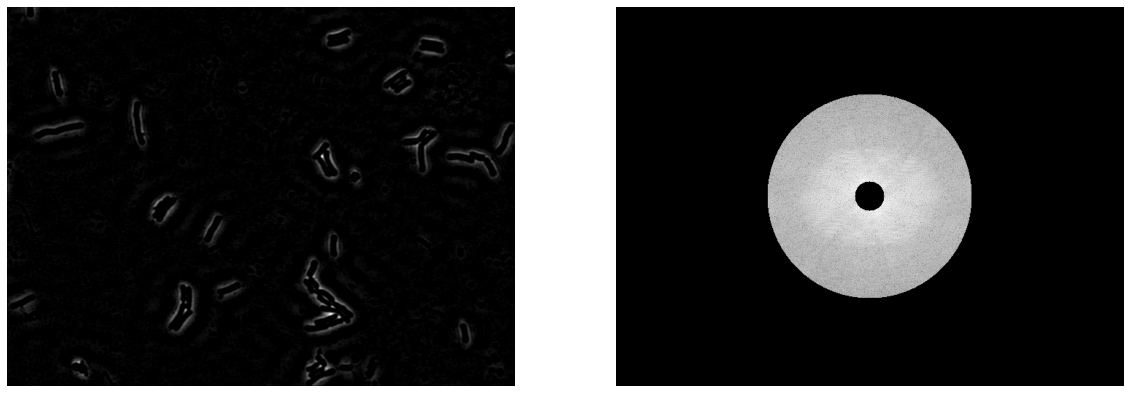

In [ ]:
radius_min = 20
radius_max = 140

Ct = np.fft.fft2(G)
Ctshift = np.fft.fftshift(Ct)
F = np.log(np.abs(Ctshift)+1) # Logaritmikus skálára hozom

fig, (a1, a2) = plt.subplots(1,2, figsize=(20, 14))

nx,ny = G.shape
X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))

R2 = np.power(X,2) + np.power(Y,2)
ind = R2 > 100**2
print(ind.shape)
for i in range(R2.shape[0]):
  for j in range(R2.shape[1]):
    v = R2[i,j]
    if(v > radius_min**2 and v < radius_max**2):
      ind[i,j] = 1
    else:
      ind[i,j] = 0

Ctshiftfilt = Ctshift * ind


Ffilt = np.log(np.abs(Ctshiftfilt)+1) # Put FFT on log scale

a2.imshow(Ffilt,cmap='gray')
a2.axis('off')

Ctfilt = np.fft.ifftshift(Ctshiftfilt)
Cfilt = np.fft.ifft2(Ctfilt).real
mask = Cfilt > 1
Cfilt = Cfilt * mask
a1.imshow(Cfilt,cmap='gray')
a1.axis('off')

plt.show()

## Kép betöltése

(512, 512)


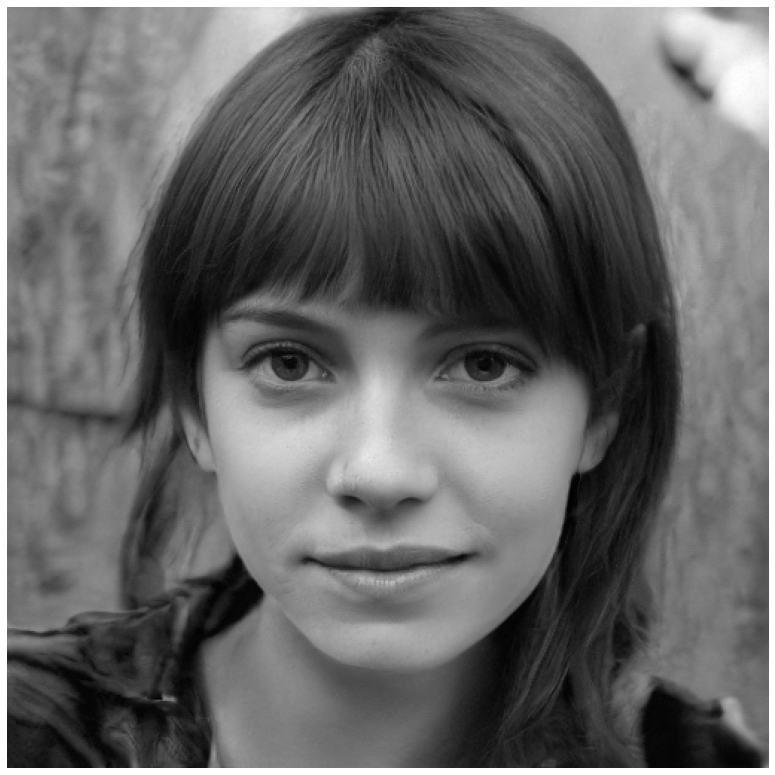

In [ ]:
E = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

G = np.mean(E, -1)

G = G[::2, ::2]

print(G.shape)

plt.figure(figsize=(14, 14))
plt.imshow(G, cmap = 'gray')
plt.axis('off')
plt.show()

(512, 512)


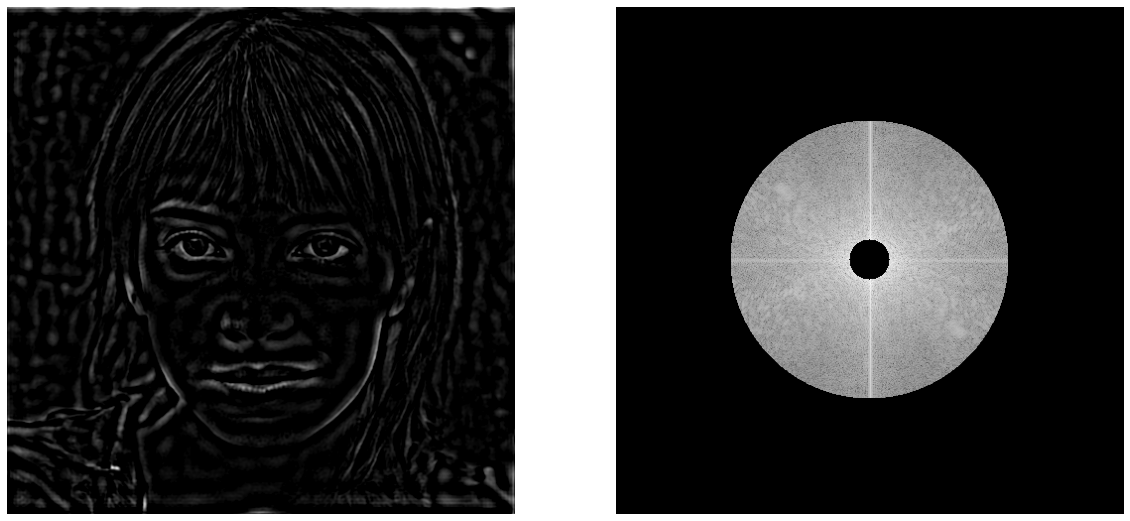

In [ ]:
radius_min = 20
radius_max = 140

Ct = np.fft.fft2(G)
Ctshift = np.fft.fftshift(Ct)
F = np.log(np.abs(Ctshift)+1) # Logaritmikus skálára hozom

fig, (a1, a2) = plt.subplots(1,2, figsize=(20, 14))

nx,ny = G.shape
X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))

R2 = np.power(X,2) + np.power(Y,2)
ind = R2 > 100**2
print(ind.shape)
for i in range(R2.shape[0]):
  for j in range(R2.shape[1]):
    v = R2[i,j]
    if(v > radius_min**2 and v < radius_max**2):
      ind[i,j] = 1
    else:
      ind[i,j] = 0

Ctshiftfilt = Ctshift * ind


Ffilt = np.log(np.abs(Ctshiftfilt)+1) # Put FFT on log scale

a2.imshow(Ffilt,cmap='gray')
a2.axis('off')

Ctfilt = np.fft.ifftshift(Ctshiftfilt)
Cfilt = np.fft.ifft2(Ctfilt).real
mask = Cfilt > 1
Cfilt = Cfilt * mask
a1.imshow(Cfilt,cmap='gray')
a1.axis('off')

plt.show()